In [337]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

In [338]:
df = pd.read_csv("NCVS_Select_-_Personal_Victimization.csv")

In [339]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63465 entries, 0 to 63464
Data columns (total 37 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   idper           63465 non-null  object 
 1   yearq           63465 non-null  float64
 2   year            63465 non-null  int64  
 3   ager            63465 non-null  int64  
 4   sex             63465 non-null  int64  
 5   hispanic        63465 non-null  int64  
 6   race            63465 non-null  int64  
 7   race_ethnicity  63465 non-null  int64  
 8   hincome1        63465 non-null  int64  
 9   hincome2        63465 non-null  int64  
 10  marital         63465 non-null  int64  
 11  popsize         63465 non-null  int64  
 12  region          63465 non-null  int64  
 13  msa             63465 non-null  int64  
 14  locality        63465 non-null  int64  
 15  educatn1        63465 non-null  int64  
 16  educatn2        63465 non-null  int64  
 17  veteran         63465 non-null 

In [340]:
df['year']

0        2004
1        2009
2        2004
3        2011
4        2004
         ... 
63460    2021
63461    2021
63462    2021
63463    2021
63464    2021
Name: year, Length: 63465, dtype: int64

In [341]:
df = df.drop(columns=(['idper']))

<Axes: title={'center': 'Cases by Year'}, xlabel='year', ylabel='count'>

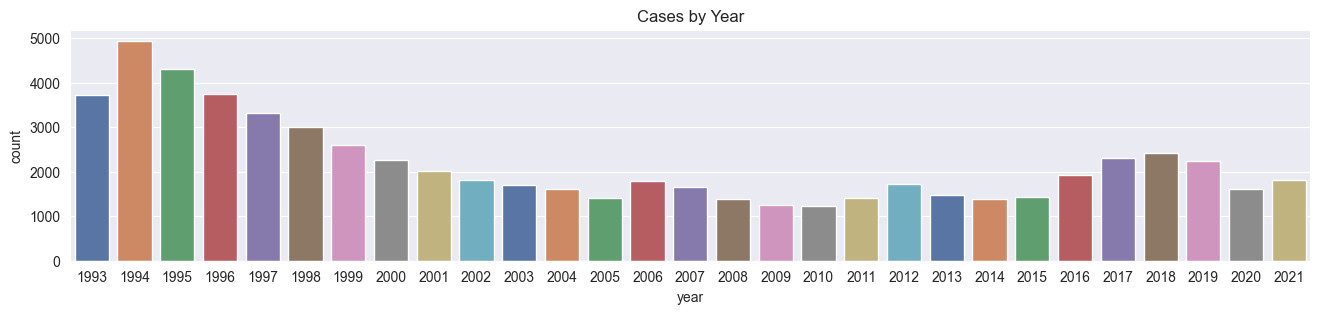

In [342]:
plt.figure(figsize=(16,3))
plt.title('Cases by Year')
sns.countplot(data=df,x='year',palette='deep')

In [343]:
quarters = []
for year in df['yearq']:
    try:
        quarter = str(year).split('.')[1]
    except IndexError:
        quarter = 'Invalid'
    quarters.append(quarter)

df['quarter'] = quarters
df['quarter'] = df['quarter'].astype(int)

In [344]:
time_df = pd.DataFrame()
time_df['YearQ'] = pd.PeriodIndex(year=df['year'].astype(int), quarter=df['quarter'])
time_df['YearQ'] = time_df['YearQ'].dt.to_timestamp()
time_df = time_df['YearQ'].value_counts().reset_index().sort_values(by=['YearQ']).reset_index(drop=True)
time_df.set_index(['YearQ'])


,count
YearQ,
1993-01-01,589
1993-04-01,536
1993-07-01,1239
1993-10-01,1366
1994-01-01,1297
...,...
2020-10-01,457
2021-01-01,450
2021-04-01,412


<Axes: ylabel='count'>

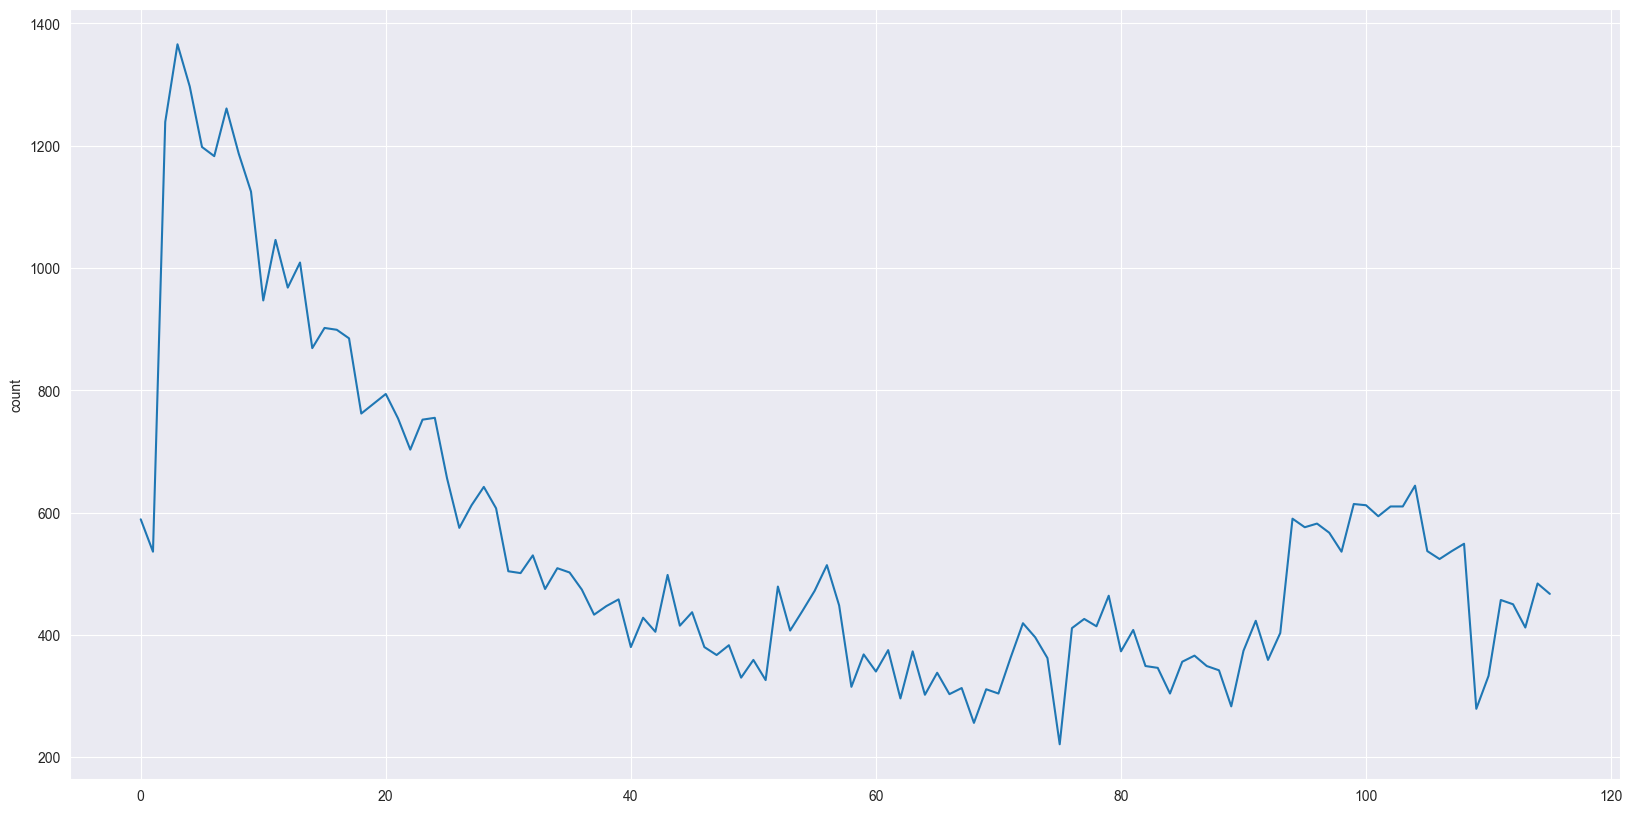

In [345]:
plt.figure(figsize=(20,10))
sns.lineplot(data=time_df,x=time_df.index,y='count')

In [346]:
time_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116 entries, 0 to 115
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   YearQ   116 non-null    datetime64[ns]
 1   count   116 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.9 KB


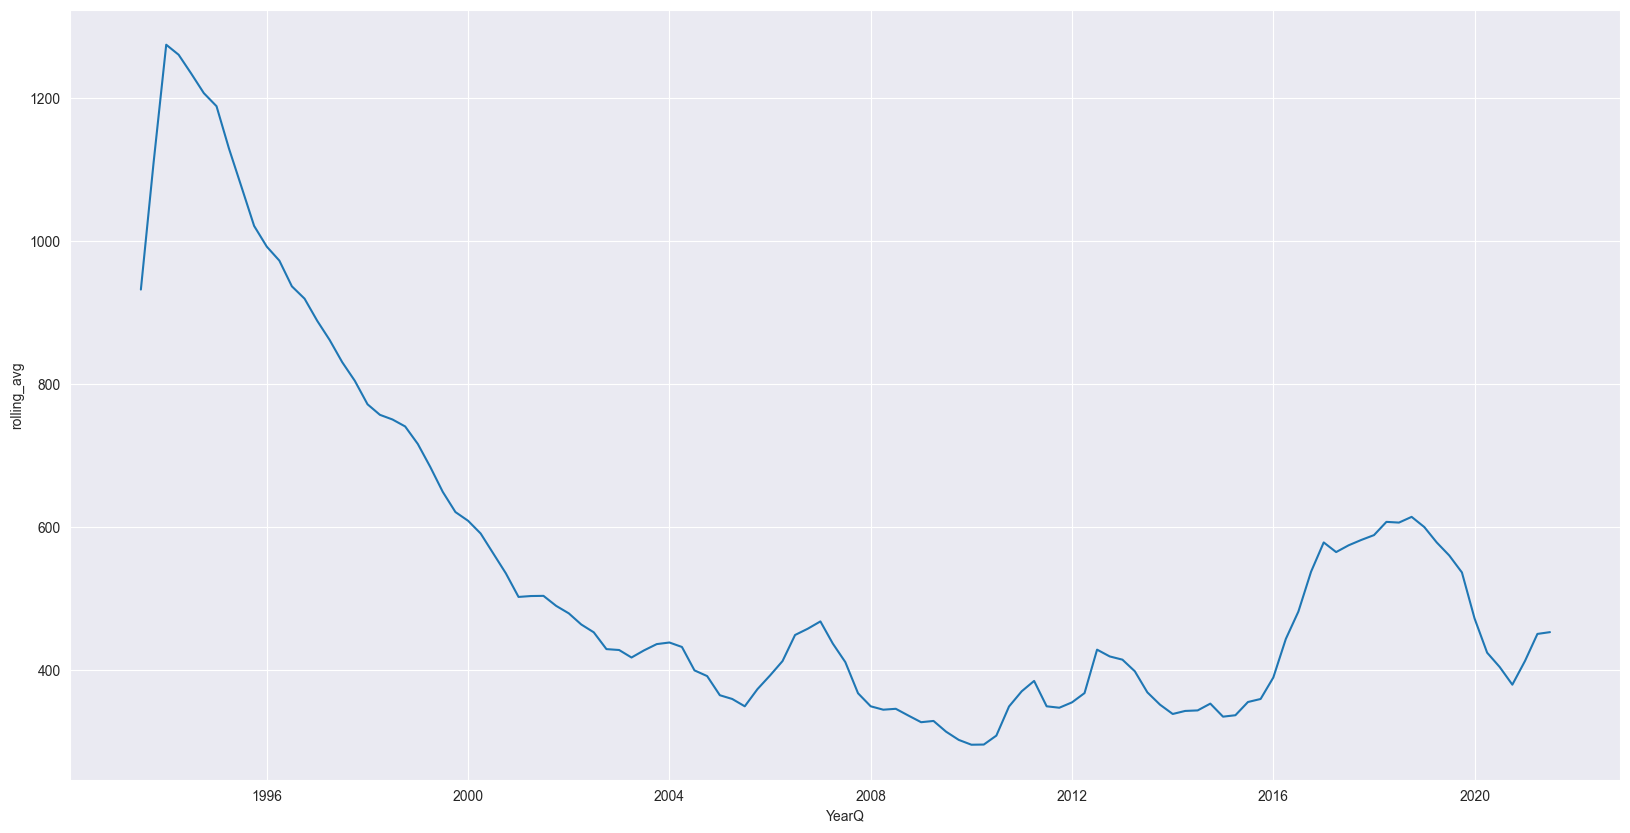

In [347]:
time_df['rolling_avg'] = time_df['count'].rolling(window=4, center=True).mean()

plt.figure(figsize=(20, 10))
sns.lineplot(data=time_df, x='YearQ', y='rolling_avg')
plt.show()

In [348]:
df

,yearq,year,ager,sex,hispanic,race,race_ethnicity,hincome1,hincome2,marital,...,injury,serious,treatment,offenderage,offendersex,offtracenew,wgtviccy,series,newwgt,quarter
0,2004.1,2004,2,2,2,2,2,1,-1,1,...,0,1,0,3,1,-1,1952.973730,1,1952.973730,1
1,2009.1,2009,1,1,2,1,1,7,-1,1,...,0,1,0,5,1,-1,5570.687730,1,5570.687730,1
2,2004.1,2004,4,1,2,1,1,5,-1,2,...,0,1,0,4,1,-1,3366.957480,1,3366.957480,1
3,2011.4,2011,3,1,1,1,6,5,-1,2,...,0,1,0,88,1,-1,6991.560610,1,6991.560610,4
4,2004.1,2004,2,1,2,1,1,6,-1,1,...,1,3,1,3,3,-1,2834.649050,1,2834.649050,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63460,2021.3,2021,2,2,2,1,1,7,3,1,...,0,1,0,4,1,1,1255.609375,1,1255.609375,3
63461,2021.3,2021,4,2,2,1,1,7,5,2,...,0,1,0,3,1,2,842.529114,1,842.529114,3
63462,2021.4,2021,1,1,2,1,1,7,3,1,...,1,3,1,1,1,7,1029.867432,1,1029.867432,4
63463,2021.3,2021,2,1,2,1,1,6,3,1,...,0,1,0,2,1,1,5833.862305,1,5833.862305,3


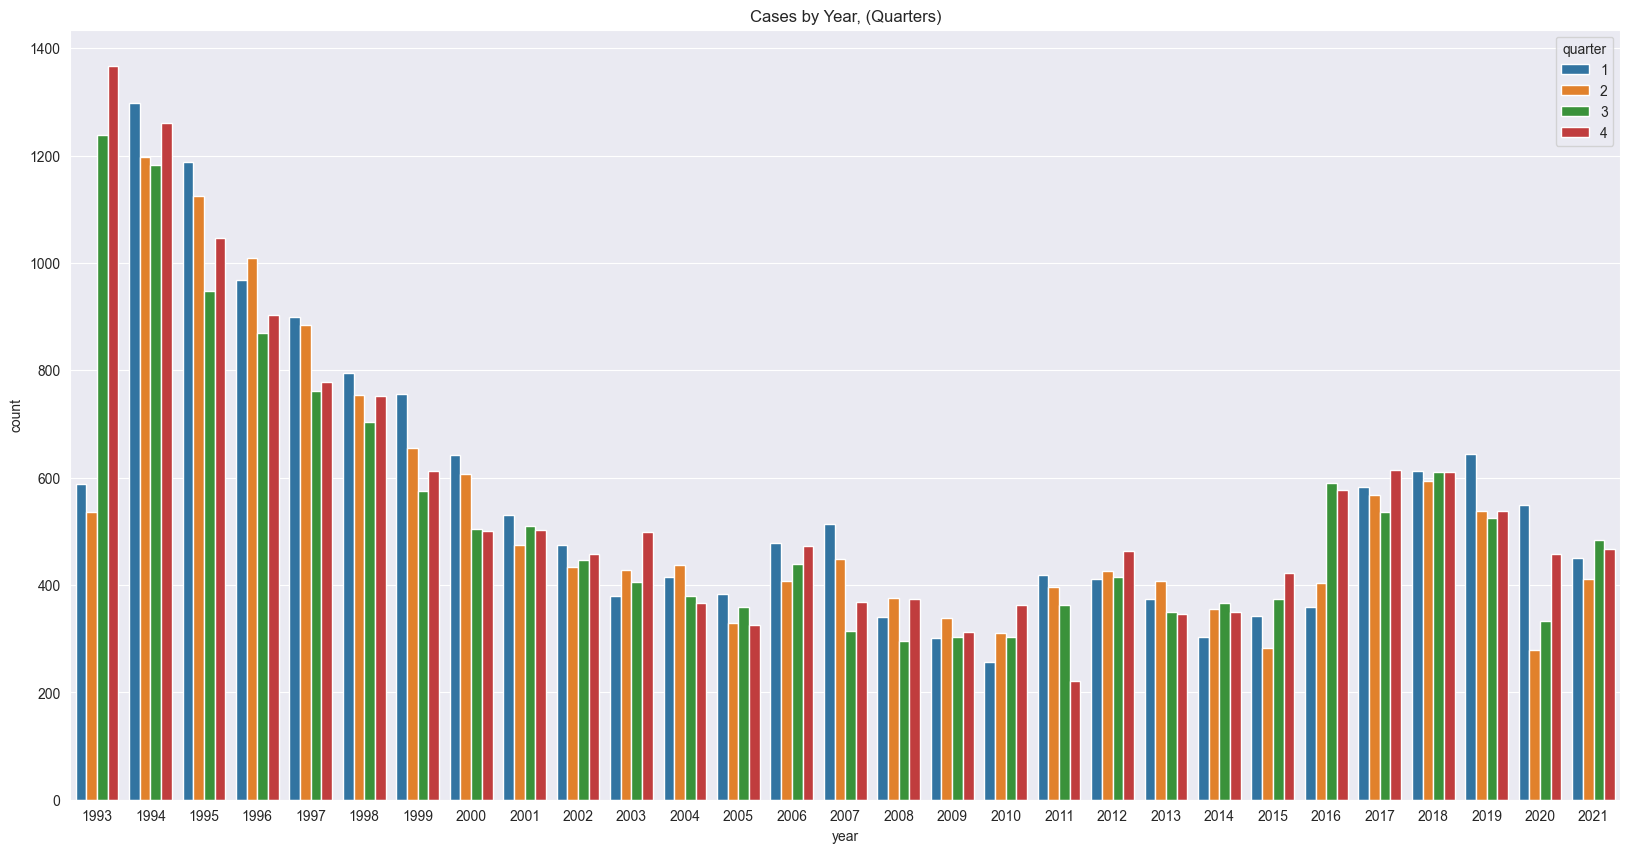

In [349]:
plt.figure(figsize=(20,10))
plt.title('Cases by Year, (Quarters)')
sns.countplot(x=df['year'],hue=df['quarter'])
plt.show()

<Axes: title={'center': 'Cases by Quarter'}, xlabel='quarter', ylabel='count'>

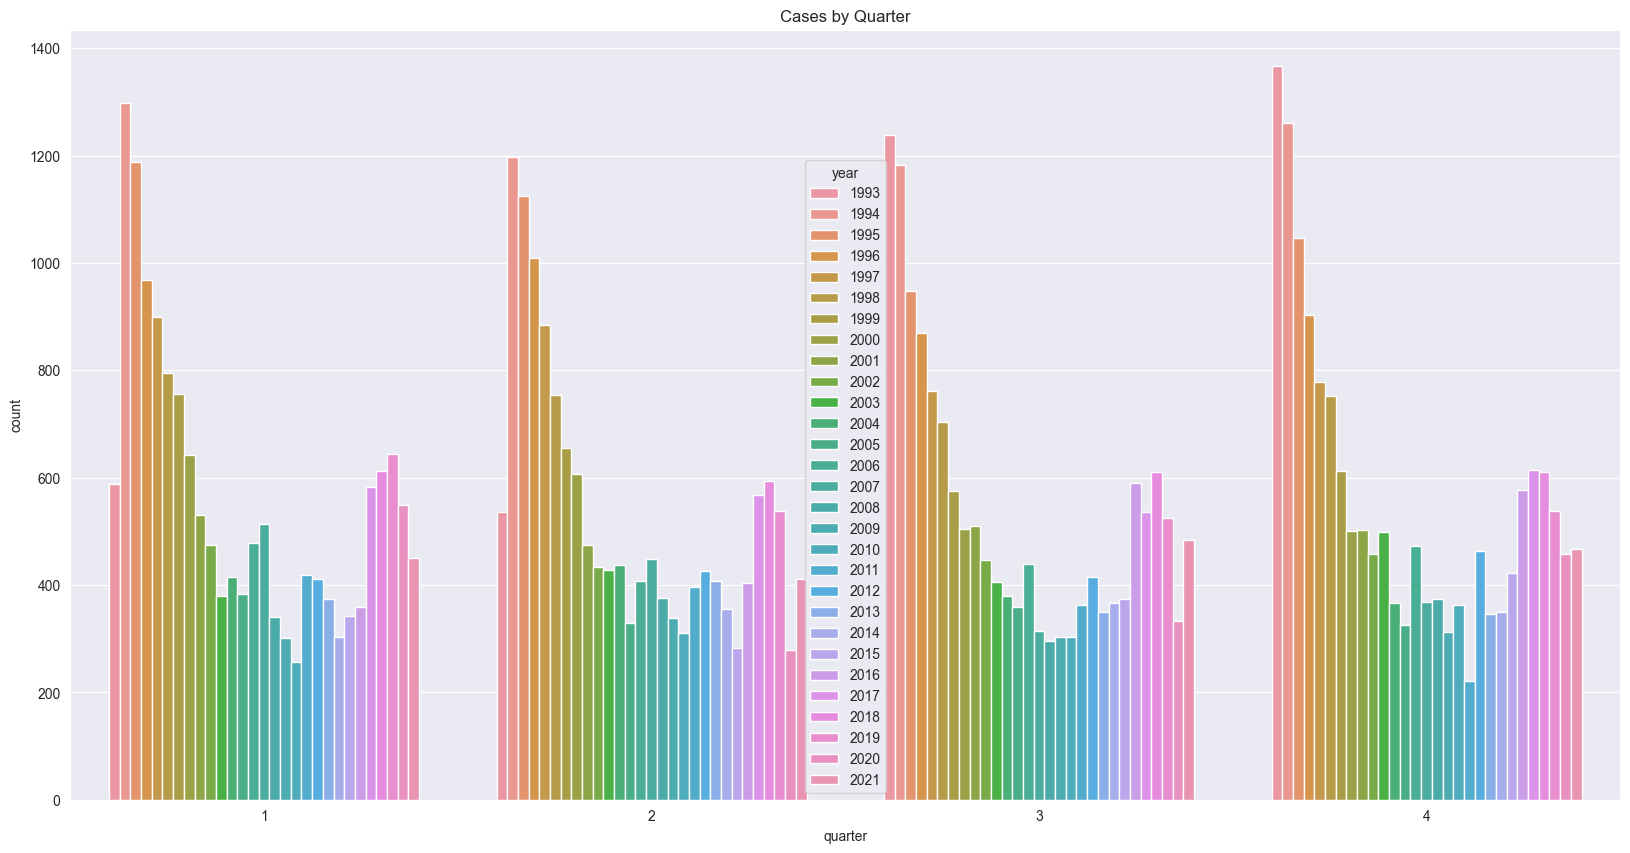

In [350]:

plt.figure(figsize=(20,10))
plt.title('Cases by Quarter')
sns.countplot(x=df['quarter'].sort_values(),hue=df['year'])

<Axes: title={'center': 'Cases by Quarter'}, xlabel='quarter', ylabel='count'>

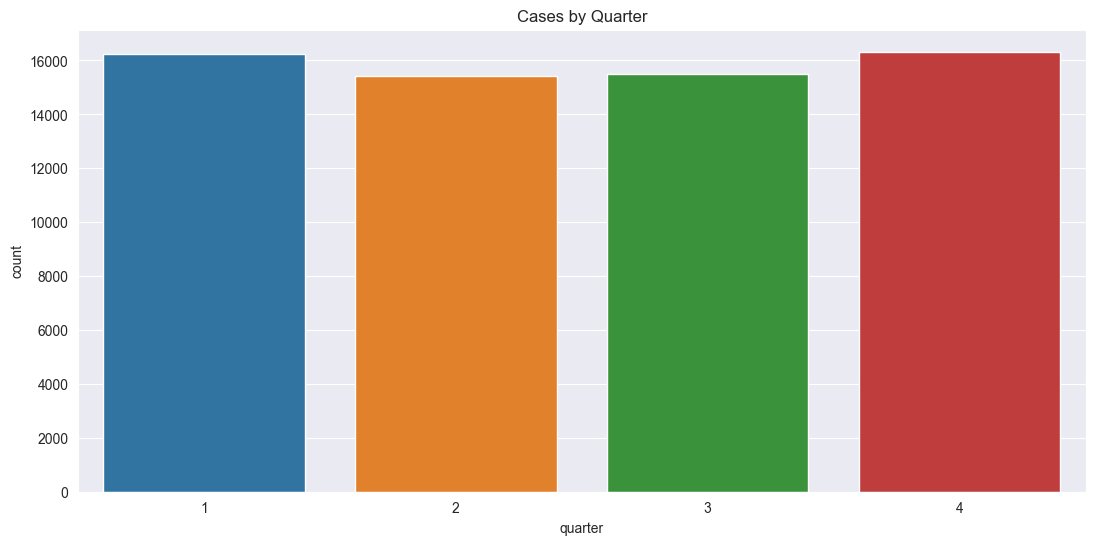

In [351]:
plt.figure(figsize=(13,6))
plt.title('Cases by Quarter')
sns.countplot(x=df['quarter'].sort_values())

In [352]:
time_df = time_df.set_index(['YearQ'])
time_df

,count,rolling_avg
YearQ,,
1993-01-01,589,NaN
1993-04-01,536,NaN
1993-07-01,1239,932.50
1993-10-01,1366,1109.50
1994-01-01,1297,1275.00
...,...,...
2020-10-01,457,379.75
2021-01-01,450,413.00
2021-04-01,412,450.75


In [366]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Perform time series decomposition
result=seasonal_decompose(time_df['count'], model='multiplicable', period=12)
trend = result.trend
seasonal = result.seasonal
residual = result.resid

<Axes: xlabel='YearQ'>

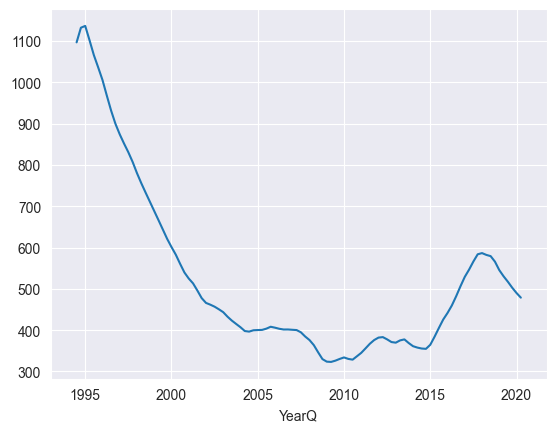

In [354]:
result.trend.plot()

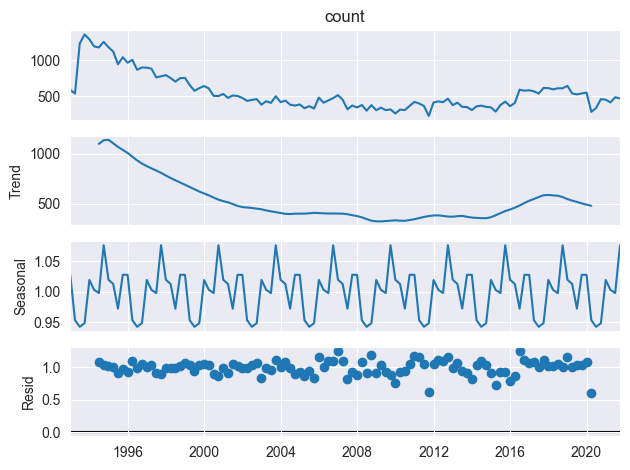

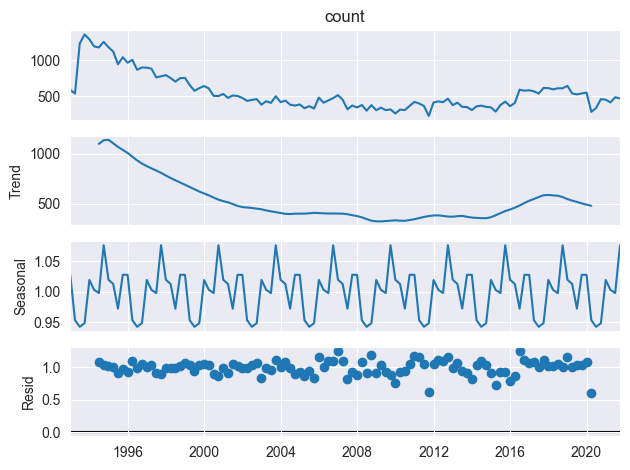

In [355]:
result.plot()


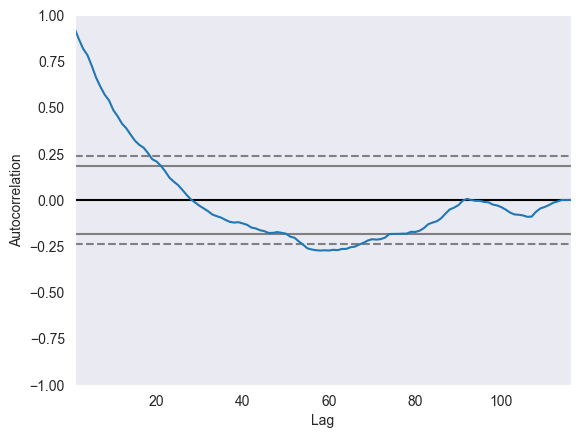

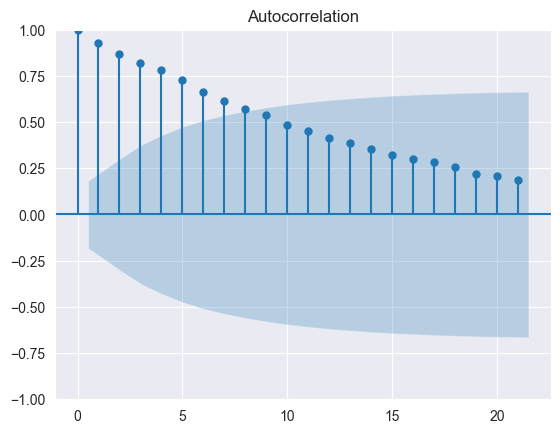

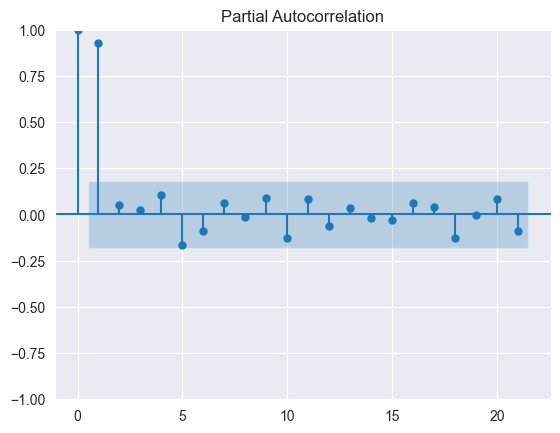

In [356]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(time_df['count'])
plot_acf(time_df['count'])
plot_pacf(time_df['count'])
plt.show()

In [357]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(time_df['count'])
p_value = result[1]
if p_value > 0.05:
    print("The data is non-stationary.")
else:
    print("The data is stationary.")

The data is stationary.


In [358]:
from statsmodels.tsa.stattools import kpss

result = kpss(time_df['count'].values, regression = "ct")
p_value = result[1]
if p_value > 0.05:
    print("The data is non-stationary.")
else:
    print("The data is stationary.")

The data is stationary.


C:\Users\Marcus Ong\AppData\Local\Temp\ipykernel_13572\3965037788.py:3: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  result = kpss(time_df['count'].values, regression = "ct")


## ARIMA

In [359]:
from statsmodels.tsa.arima.model import ARIMA


In [364]:
  # Use 80% of the data for training
train_data = time_df['count']
test_data = time_df['count']
train_data

YearQ
1993-01-01     589
1993-04-01     536
1993-07-01    1239
1993-10-01    1366
1994-01-01    1297
              ... 
2020-10-01     457
2021-01-01     450
2021-04-01     412
2021-07-01     484
2021-10-01     467
Name: count, Length: 116, dtype: int64

In [361]:
 # Define the order of the ARIMA model (p: autoregressive order, d: differencing order, q: moving average order)
model = ARIMA(train_data, order=(20,1,0))
fitted_model = model.fit()

e:\ViolenceAgainstWomen\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
e:\ViolenceAgainstWomen\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
e:\ViolenceAgainstWomen\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
e:\ViolenceAgainstWomen\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [362]:
forecast = fitted_model.forecast(steps=len(test_data))
results = pd.DataFrame({'Actual': test_data.values, 'Forecast': forecast})
results

,Actual,Forecast
2022-01-01,589,505.429278
2022-04-01,536,513.935377
2022-07-01,1239,458.993112
2022-10-01,1366,465.819238
2023-01-01,1297,491.079798
...,...,...
2049-10-01,457,499.369708
2050-01-01,450,500.293475
2050-04-01,412,511.485940
2050-07-01,484,511.166962


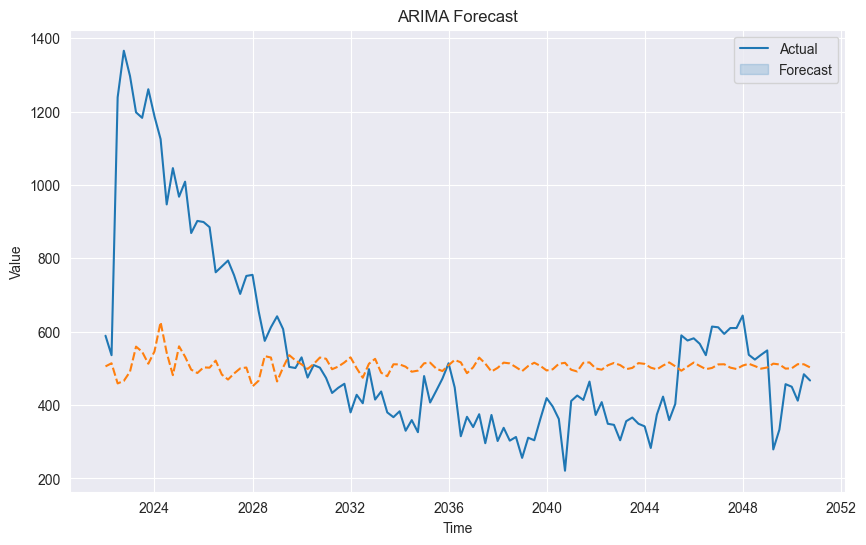

In [363]:

sns.set_style("darkgrid")
plt.figure(figsize=(10, 6))
sns.lineplot(data=results)
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('ARIMA Forecast')
plt.legend(['Actual', 'Forecast'])
plt.show()